## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import random
from prettytable import PrettyTable

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
#data['target'] is y value

In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>


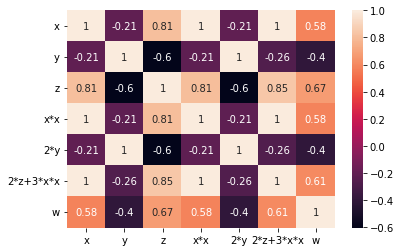

In [5]:
x_pd=data.drop(['target'], axis=1)
x_pd.corr(method='pearson')
sns.heatmap(x_pd.corr(),annot=True)

In [6]:
#Performing Hyperparameter tuning

In [7]:
model=SGDClassifier(loss='log',penalty='l2',random_state=0,eta0=0.1,learning_rate='constant')
a=[0.1,0.001,0.0001,1,2,5,10,50,100,1000]
params={'alpha':a}
train=GridSearchCV(model,params)
train.fit(X,Y)

GridSearchCV(estimator=SGDClassifier(eta0=0.1, learning_rate='constant',
                                     loss='log', random_state=0),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1, 2, 5, 10, 50, 100,
                                   1000]})

In [8]:
train.best_params_

{'alpha': 0.1}

In [9]:
best_model=SGDClassifier(loss='log',penalty='l2',random_state=0,eta0=0.1,learning_rate='constant',alpha=0.1)
best_model.fit(X,Y)

SGDClassifier(alpha=0.1, eta0=0.1, learning_rate='constant', loss='log',
              random_state=0)

In [10]:
w=best_model.coef_
b=best_model.intercept_


In [11]:
#Checking the accuracy of best model
correct=0
y_pred=best_model.predict(X)
for x in range(len(y_pred)):   
    if y_pred[x]==Y[x]:
        correct+=1
    else:
        correct+=0
    accuracy=(correct/len(y_pred)*100)
print('The accuracy of Best Model is ',accuracy)

The accuracy of Best Model is  100.0


In [12]:
weights_1=data.columns[np.argsort(w)[0]].values
print('The Weights in Descending Orders are',weights_1)

The Weights in Descending Orders are ['y' '2*y' 'w' 'x*x' 'x' '2*z+3*x*x' 'z']


### New X with error

In [13]:
x_i=[]
for i in X:
    e=random.uniform(0,0.1)
    x_new=i+e
    x_i.append(x_new)

In [14]:
best_model_edited=SGDClassifier(loss='log',penalty='l2',random_state=0,eta0=0.1,learning_rate='constant',alpha=0.15)
best_model_edited.fit(x_i,Y)

SGDClassifier(alpha=0.15, eta0=0.1, learning_rate='constant', loss='log',
              random_state=0)

In [15]:
w_i=best_model_edited.coef_
b_i=best_model_edited.intercept_

In [16]:
#Checking Accuracy
i=0
y_pred_n=best_model_edited.predict(x_i)
for x in range(len(y_pred_n)):   
    if y_pred_n[x]==Y[x]:
        i+=1
    else:
        i+=0
    accuracy_i=(i/len(y_pred_n)*100)
print('The accuracy of Best Model Edited is ',accuracy_i)



The accuracy of Best Model Edited is  100.0


In [17]:
#Checking Deviation in Metrics

In [18]:
accuracy_diff=accuracy_i- accuracy
print(accuracy_diff)

0.0


In [19]:
w_diff=(abs(w-w_i)/abs(w))*100
#print(w_diff)
values=np.argsort(w_diff)[0][:2:-1]
weights_2=data.columns[values].values
print('The features with maximum change in weights are ', weights_2)

The features with maximum change in weights are  ['z' 'x' '2*z+3*x*x' 'w']


In [20]:
abs_diff=abs(w-w_i)

In [21]:
p_diff_loss=(abs_diff/w)*100

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [22]:
model_sgd=SGDClassifier(loss='hinge',penalty='l2',random_state=0,eta0=0.1,learning_rate='constant')
params={'alpha':a}
train=GridSearchCV(model_sgd,params)
train.fit(X,Y)

GridSearchCV(estimator=SGDClassifier(eta0=0.1, learning_rate='constant',
                                     random_state=0),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1, 2, 5, 10, 50, 100,
                                   1000]})

In [23]:
train.best_params_

{'alpha': 0.1}

In [24]:
best_model_sgd=SGDClassifier(loss='hinge',penalty='l2',random_state=0,eta0=0.1,learning_rate='constant',alpha=0.1)
best_model_sgd.fit(X,Y)
w_sgd=best_model_sgd.coef_
b_sgd=best_model_sgd.intercept_

In [25]:
y_pred_sgd=best_model_sgd.predict(X)
correct=0
for i in range(len(y_pred_sgd)):   
    if y_pred_sgd[i]==Y[i]:
        correct+=1
    else:
        correct+=0
    accuracy_sgd=(correct/len(y_pred_sgd)*100)
print('The accuracy of Best Model is ',accuracy_sgd)

The accuracy of Best Model is  99.0


In [26]:
weights_3=data.columns[np.argsort(w_sgd)[0]].values
print('The Weights in Descending Orders are',weights_3)

The Weights in Descending Orders are ['y' '2*y' 'x*x' 'w' 'x' '2*z+3*x*x' 'z']


In [27]:
best_model_sgd_i=SGDClassifier(loss='hinge',penalty='l2',random_state=0,eta0=0.1,learning_rate='constant',alpha=0.1)
best_model_sgd_i.fit(x_i,Y)
w_sgd_i=best_model_sgd_i.coef_
b_sgd_i=best_model_sgd_i.intercept_

In [28]:
y_pred_sgd_i=best_model_sgd_i.predict(X)
correct=0
for i in range(len(y_pred_sgd_i)):   
    if y_pred_sgd_i[i]==Y[i]:
        correct+=1
    else:
        correct+=0
    accuracy_sgd_i=(correct/len(y_pred_sgd_i)*100)
print('The accuracy of Best Model is ',accuracy_sgd_i)

The accuracy of Best Model is  100.0


In [29]:
print('Change in Accuracy',(accuracy_sgd-accuracy_sgd_i))

Change in Accuracy -1.0


In [30]:
weights_4=data.columns[np.argsort(w_sgd_i)[0]].values
print('The Weights in Descending Orders are',weights_4)

The Weights in Descending Orders are ['y' '2*y' 'w' 'x*x' 'x' '2*z+3*x*x' 'z']


In [31]:
abs_diff_sgd=abs(w_sgd-w_sgd_i)

In [32]:
p_diff_sgd=abs_diff/w_sgd*100

In [33]:
table=PrettyTable()
table.field_names=['y', '2*y' ,'w' ,'x*x' ,'x' ,'2*z+3*x*x', 'z']
table.add_row(np.round(w[0],5))
table.add_row(np.round(w_i[0],5))
table.add_row(np.round(w_sgd[0],5))
table.add_row(np.round(w_sgd_i[0],5))
table.add_column('Loss',['Log','Log','Hinge','Hinge'])
print('Weights in each Model')
print(table)

Weights in each Model
+---------+----------+---------+---------+----------+-----------+---------+-------+
|    y    |   2*y    |    w    |   x*x   |    x     | 2*z+3*x*x |    z    |  Loss |
+---------+----------+---------+---------+----------+-----------+---------+-------+
| 0.39708 | -0.54694 | 0.77597 | 0.37803 | -0.54694 |  0.43391  |  0.3249 |  Log  |
| 0.34214 | -0.49821 | 0.65189 |  0.3281 | -0.49821 |   0.374   |  0.2816 |  Log  |
| 0.18693 | -0.36646 | 0.63682 |  0.165  | -0.36646 |  0.22539  | 0.17592 | Hinge |
| 0.17861 | -0.40686 | 0.69872 | 0.16673 | -0.40686 |  0.23451  | 0.05508 | Hinge |
+---------+----------+---------+---------+----------+-----------+---------+-------+


In [34]:
print('Percentage Difference')
percent=PrettyTable()
percent.field_names=['y', '2*y' ,'w' ,'x*x' ,'x' ,'2*z+3*x*x', 'z']
percent.add_row(np.round(p_diff_loss[0],5))
percent.add_row(np.round(p_diff_sgd[0],5))
percent.add_column('Loss', ['Log','Hinge'])
print(percent)

Percentage Difference
+----------+-----------+----------+----------+-----------+-----------+----------+-------+
|    y     |    2*y    |    w     |   x*x    |     x     | 2*z+3*x*x |    z     |  Loss |
+----------+-----------+----------+----------+-----------+-----------+----------+-------+
| 13.83497 |  -8.90929 | 15.99097 | 13.20853 |  -8.90929 |  13.80888 | 13.32767 |  Log  |
| 29.38821 | -13.29715 | 19.48516 | 30.26179 | -13.29715 |  26.58486 | 24.61457 | Hinge |
+----------+-----------+----------+----------+-----------+-----------+----------+-------+


### Conclusion:
- Though the accuracy of the model has not much been effected in this dataset, however it is clearly evident that correlation changes the "weights" which will indeed affect the final performance of the model like accuracy, Confusion Matrix or Squared Loss etc in Regresion.
- It is also clear that SVM is highly affected as compared to a Logistic Regression, because the % change of the value of weights is high for SVM.